In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

In [4]:
L        = 50.0                
U_stream = 50.0         
Reynold  = 1e4         
kin_vis  = (U_stream * L) / Reynold  

Nx       = 100        
Ny       = 100              
x        = np.linspace(0, L, Nx) 
y_max    = 1
y        = np.linspace(0, y_max, Ny)        
dy       = y_max / (Ny - 1)  

dx       = (dy **2) / (2 * kin_vis)

u        = np.ones((Nx, Ny), dtype=float) * U_stream  
v        = np.ones((Nx, Ny))  
u_new    = np.zeros((Nx,Ny))

u[:, 0]  = 0
u[:, -1] = U_stream 
v[:, 0]  = 0 
v[0, :]  = 0

In [5]:
def contour(x, y, field, title, label):
    X, Y = np.meshgrid(x, y)
    plt.figure(figsize=(10, 11))
    plt.contourf(X, Y, field.T, levels=50, cmap='viridis')
    plt.colorbar(label=label)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.ylim(0, 0.6)
    plt.title(title)
    plt.show()

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.15253546e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 5.15253546e-01 2.62831354e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [0.00000000e+00 9.46396248e-01 8.80064486e-01 ... 1.43543987e-16
  0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 9.46396248e-01 8.81722074e-01 ... 1.43543987e-16
  1.43543987e-16 1.00000000e+00]
 [0.00000000e+00 9.47208299e-01 8.81722074e-01 ... 2.87087974e-16
  1.43543987e-16 1.00000000e+00]]


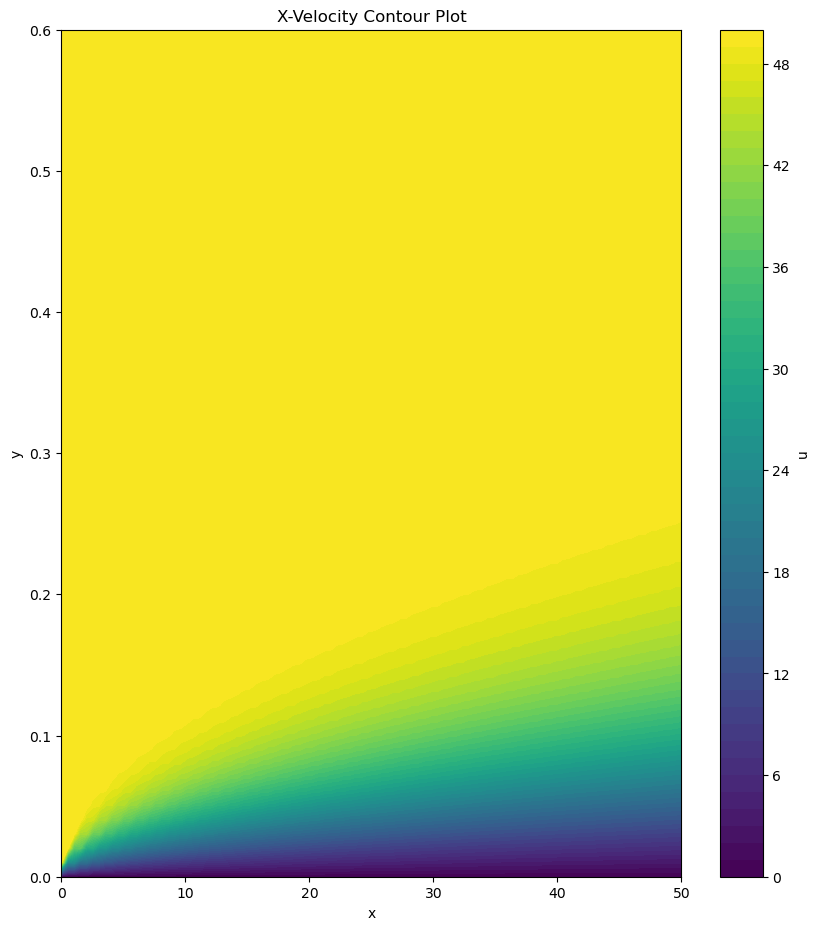

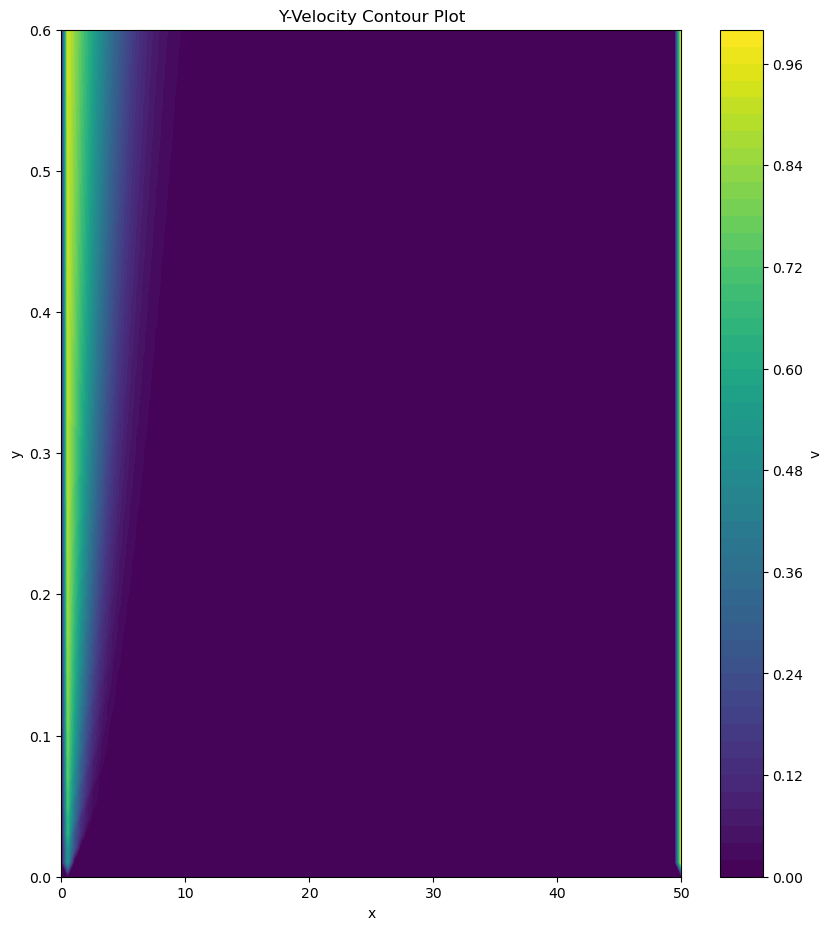

In [6]:
for i in range(1, Nx):
    u_last = u[i-1, :]
    

    for j in range(1, Ny-1):

        u[i, j] = u_last[j] + dx * (
            -v[i, j] * (u_last[j+1] - u_last[j-1]) / (2 * dy)
            + kin_vis * (u_last[j+1] - 2 * u_last[j] + u_last[j-1]) / dy**2
        )
        v[i, j] = v[i-1, j] - (dx / dy) * (u[i, j] - u[i-1, j])

print(v)


contour(x, y, u, "X-Velocity Contour Plot", "u")
contour(x,y, v.T, "Y-Velocity Contour Plot", "v")

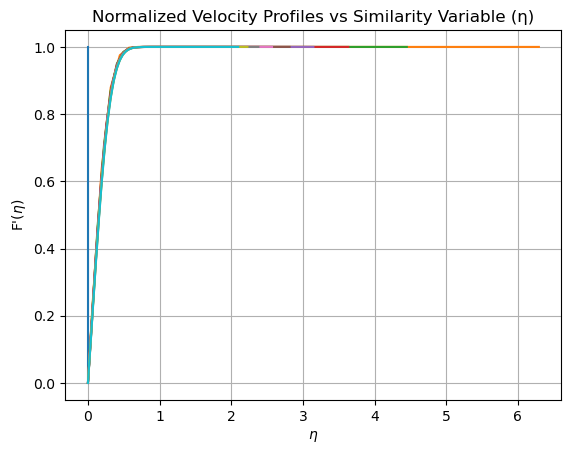

In [7]:
F_prime = np.zeros((Nx, Ny))  
eta = np.zeros((Nx, Ny))  

for i, xi in enumerate(x):
    for j, yj in enumerate(y):
        eta[i, j] = yj * np.sqrt(U_stream / (kin_vis * xi)) if xi != 0 else 0  
        F_prime[i, j] = u[i, j] / U_stream  

plt.figure()

for i in range(0, Nx, Nx // 10):
    plt.plot(eta[i, :], F_prime[i, :], label=f'x = {x[i]:.2f} m')

plt.xlabel(r'$\eta$')
plt.ylabel("F'($\eta$)")
plt.title("Normalized Velocity Profiles vs Similarity Variable (η)")
plt.grid(True)

plt.show()

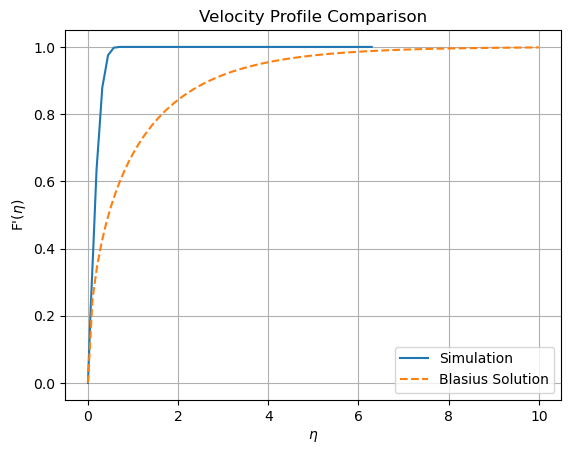

In [8]:
x_location = int(0.1 * Nx) 

# Normalized velocity profile F'(η)
F_prime_x = u[x_location, :] / U_stream  

# Similarity variable η
eta_x = y * np.sqrt(U_stream / (kin_vis * x[x_location]))

# Blasius solution
eta_blasius = np.linspace(0, 10, 100)
F_prime_blasius = erf(np.sqrt(eta_blasius / 2))

# Plot comparison
plt.figure()
plt.plot(eta_x, F_prime_x, label=f'Simulation')
plt.plot(eta_blasius, F_prime_blasius, '--', label='Blasius Solution')
plt.xlabel(r'$\eta$')
plt.ylabel("F'($\eta$)")
plt.title(f"Velocity Profile Comparison")
plt.grid(True)
plt.legend()
plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_8680\2216109530.py:17: RuntimeWarning: invalid value encountered in divide
  delta_blasius = ((4.91 * x) / (np.sqrt(Rex)))/5


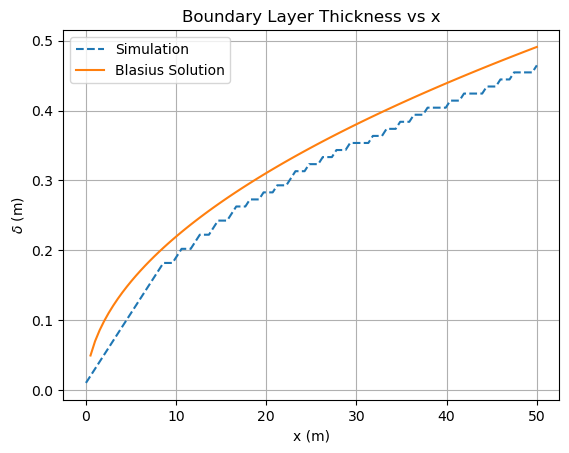

In [9]:
def thickness(u, y, U_stream, Nx, Ny):
    delta = np.zeros(Nx)  # to store boundary layer thickness at each x
    
    for i in range(Nx):
        delta_idx = np.where(u[i, :] >= 0.99999 * U_stream)[0]  
        if len(delta_idx) > 0:
            delta[i] = y[delta_idx[0]]
        else:
            delta[i] = L  
    return delta

# Compute boundary layer thickness from simulation
delta_simulation = thickness(u, y, U_stream, Nx, Ny)

# Blasius solution for comparison
Rex = (U_stream * x) / kin_vis 
delta_blasius = ((4.91 * x) / (np.sqrt(Rex)))/5

plt.figure()
plt.plot(x, delta_simulation, '--', label='Simulation')
plt.plot(x, delta_blasius, label='Blasius Solution')
plt.xlabel('x (m)')
plt.ylabel(r'$\delta$ (m)')
plt.title('Boundary Layer Thickness vs x')
plt.grid(True)
plt.legend()
plt.show()